<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/Unsupervised-learning/blob/main/mall_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset**
**Context**

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.


**Content : Additional Variable Information**
1. FRESH: annual spending (m.u.) on fresh products (Continuous);
2. MILK: annual spending (m.u.) on milk products (Continuous);
3. GROCERY: annual spending (m.u.)on grocery products (Continuous);
4. FROZEN: annual spending (m.u.)on frozen products (Continuous)
5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6. DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7. CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8. REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)


**Problem Statement**
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [29]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
## reading csv file
path = "/content/Wholesale customers data.csv"
data = pd.read_csv(path)

data.sample(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
336,1,2,13970,1511,1330,650,146,778
296,1,2,19087,1304,3643,3045,710,898


In [31]:
## checking data :
print(f"null data : \n {data.isnull().sum()}")
print(f"duplcated values in data:\n{data.duplicated().sum()}")
print(f"data shape:\n{data.shape}")
data.info()

null data : 
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
duplcated values in data:
0
data shape:
(440, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


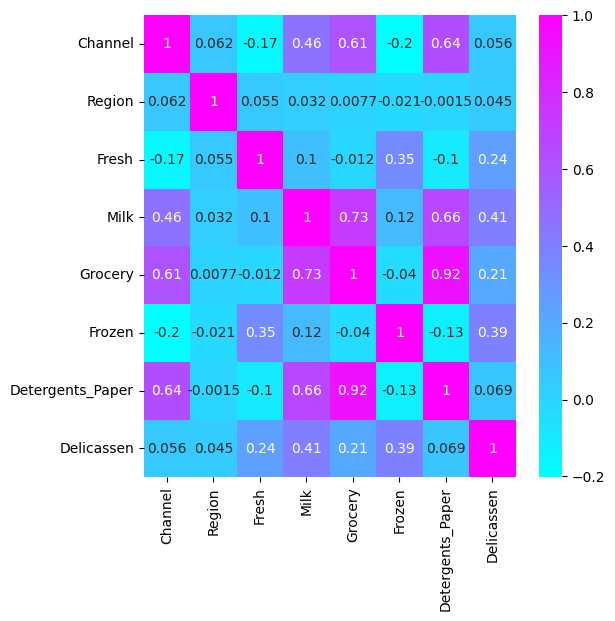

In [32]:
### EXPLORING DATA:
plt.figure(figsize=(6, 6))
sns.heatmap(data.corr(numeric_only=True), cmap='cool', annot=True);


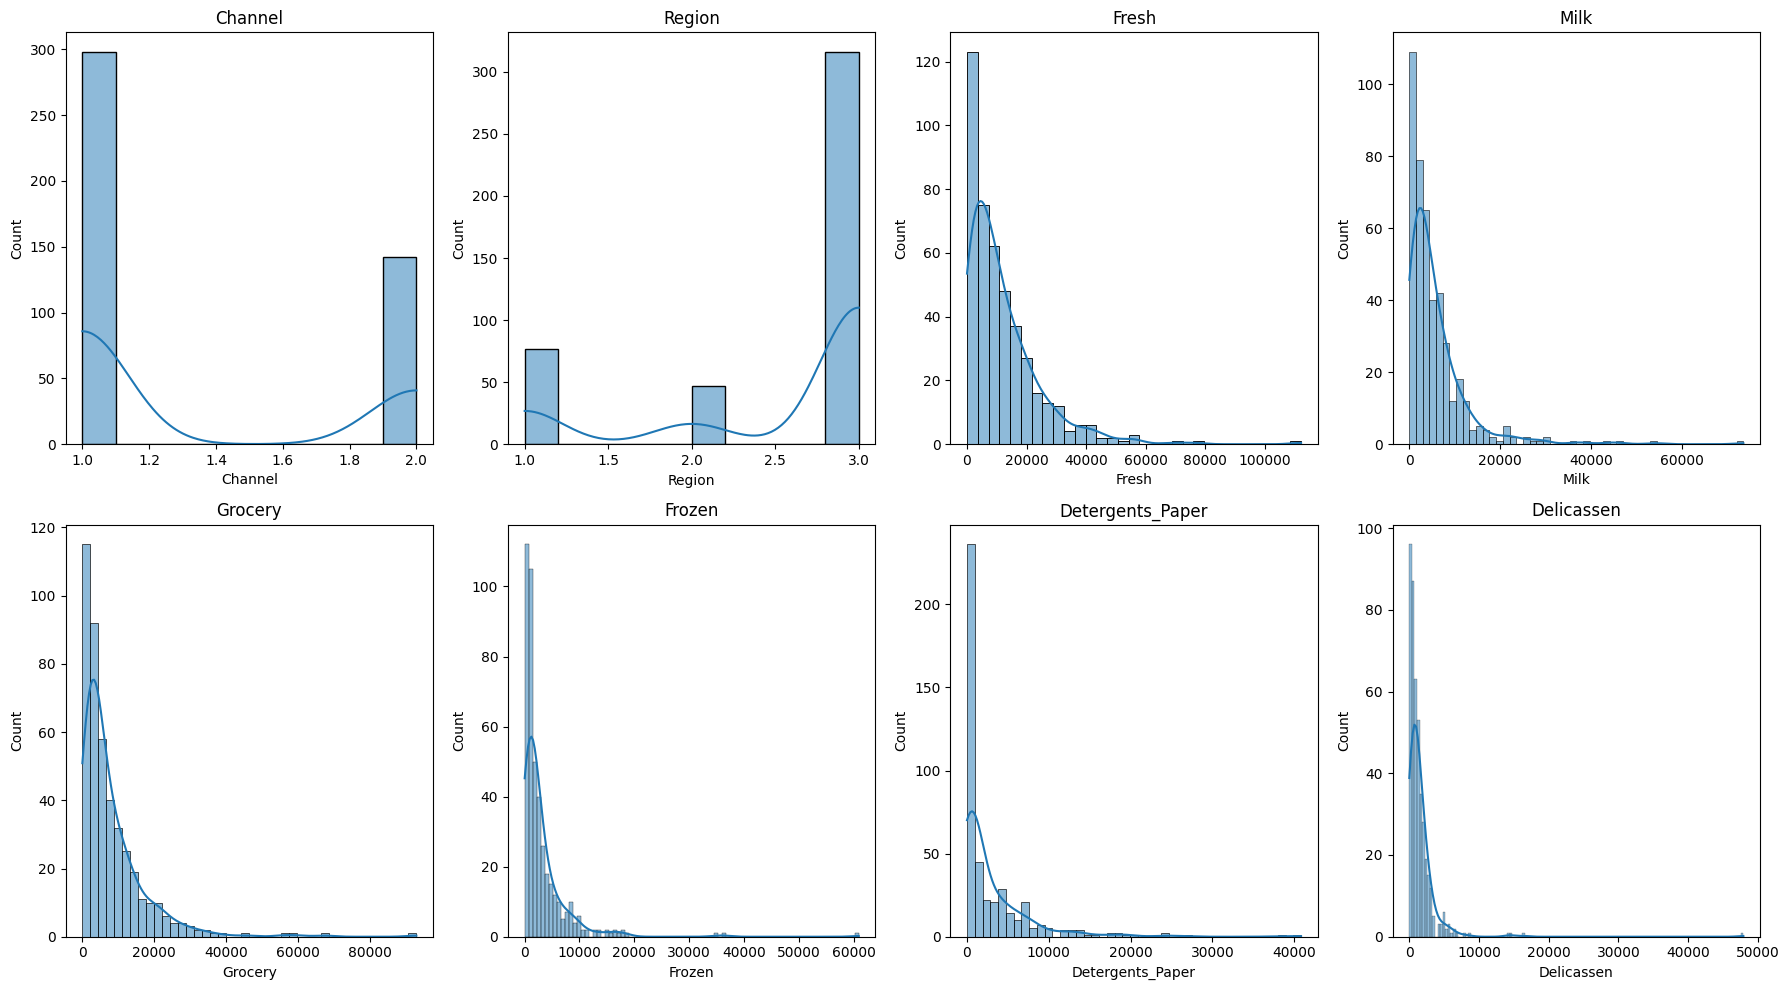

In [5]:
#### ploting histplot:

num_rows = 2
num_cols = 4

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 10))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(data.columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


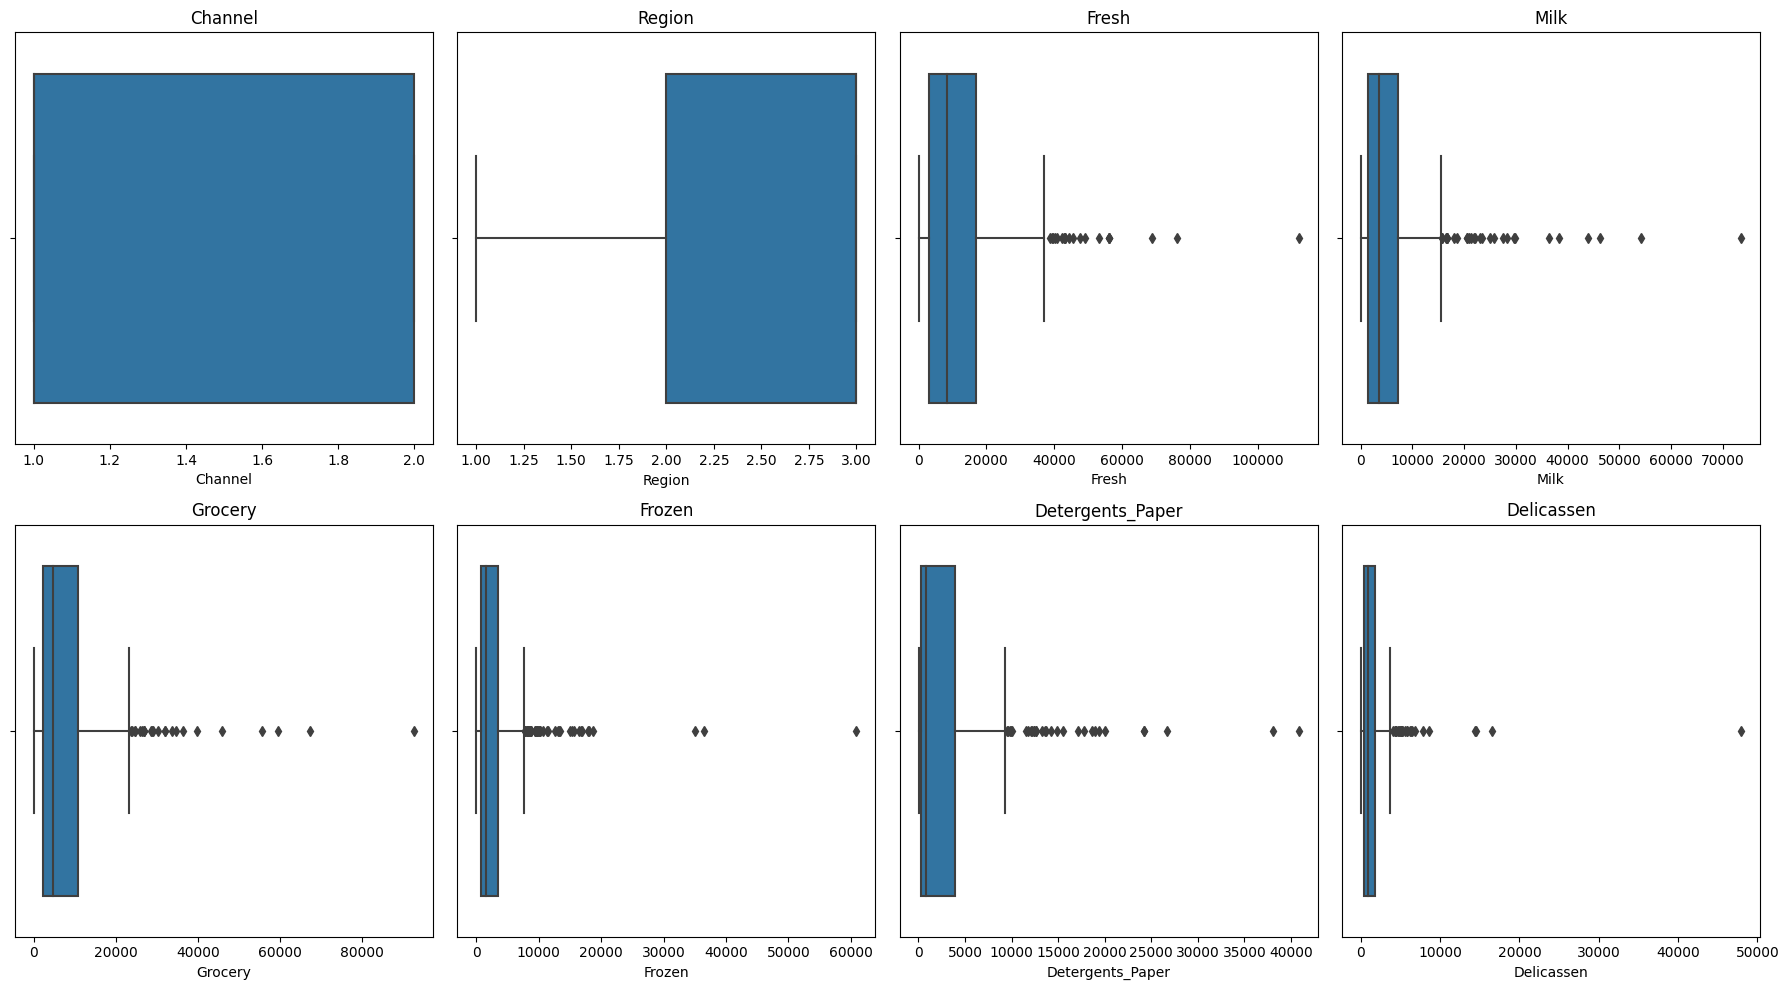

In [6]:
## box plot
numerical_col = []
categorical_col = []
# Iterate through columns and check if they are numeric
for i in data.columns:
    if pd.api.types.is_numeric_dtype(data[i]):
        numerical_col.append(i)
    else:
        categorical_col.append(i)


num_rows = 2
num_cols = 4



# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 10))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(data[numerical_col]):
    sns.boxplot(data= data[numerical_col], x = col, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [7]:
## data describe:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


#### removing outlires extremety:

In [8]:
## checking fresh datapoints:
data[data['Fresh']> 38000]['Fresh'].count()


20

In [9]:
## removing outlier from Fresh:
window_size_fresh = 38000
for i in range(len(data.Fresh)):
    if data.loc[i, 'Fresh'] > window_size_fresh:
        data.loc[i, 'Fresh'] = window_size_fresh


In [10]:
## checking Milk datapoints:
data[data['Milk']> 18000]['Milk'].count()


21

In [11]:
## removing outlier from Milk:
window_size_milk = 18000
for i in range(len(data.Milk)):
    if data.loc[i, 'Milk'] > window_size_milk:
        data.loc[i, 'Milk'] = window_size_milk


In [12]:
## checking Grocery datapoints:
data[data['Grocery']> 25000]['Grocery'].count()


20

In [13]:
## removing outlier from Grocery:
window_size_grocery = 25000
for i in range(len(data.Grocery)):
    if data.loc[i, 'Grocery'] > window_size_grocery:
        data.loc[i, 'Grocery'] = window_size_grocery

In [14]:
## checking Frozen datapoints:
data[data['Frozen']> 11000]['Frozen'].count()


18

In [15]:
## removing outlier from Frozen:
window_size_frozen = 11000
for i in range(len(data.Frozen)):
    if data.loc[i, 'Frozen'] > window_size_frozen:
        data.loc[i, 'Frozen'] = window_size_frozen

In [16]:
## checking Detergents_Paper datapoints:
data[data['Detergents_Paper']> 13000]['Detergents_Paper'].count()


17

In [17]:
## removing outlier from Detergents_Paper:
window_size_dp = 11000
for i in range(len(data.Detergents_Paper)):
    if data.loc[i, 'Detergents_Paper'] > window_size_dp:
        data.loc[i, 'Detergents_Paper'] = window_size_dp

In [18]:
## checking Delicassen datapoints:
data[data['Delicassen']> 5000]['Delicassen'].count()


19

In [19]:
## removing outlier from Delicassen:

window_size_Delicassen = 5000
for i in range(len(data.Delicassen)):
    if data.loc[i, 'Delicassen'] > window_size_Delicassen:
        data.loc[i, 'Delicassen'] = window_size_Delicassen

In [20]:
## describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,11373.806818,10253.621828,3.0,3127.75,8504.0,16933.75,38000.0
Milk,440.0,5174.261364,4709.735693,55.0,1533.00,3627.0,7190.25,18000.0
Grocery,440.0,7316.461364,6799.147473,3.0,2153.00,4755.5,10655.75,25000.0
Frozen,440.0,2706.831818,2901.196066,25.0,742.25,1526.0,3554.25,11000.0
Detergents_Paper,440.0,2486.713636,3179.497911,3.0,256.75,816.5,3922.00,11000.0
Delicassen,440.0,1323.111364,1236.156679,3.0,408.25,965.5,1820.25,5000.0


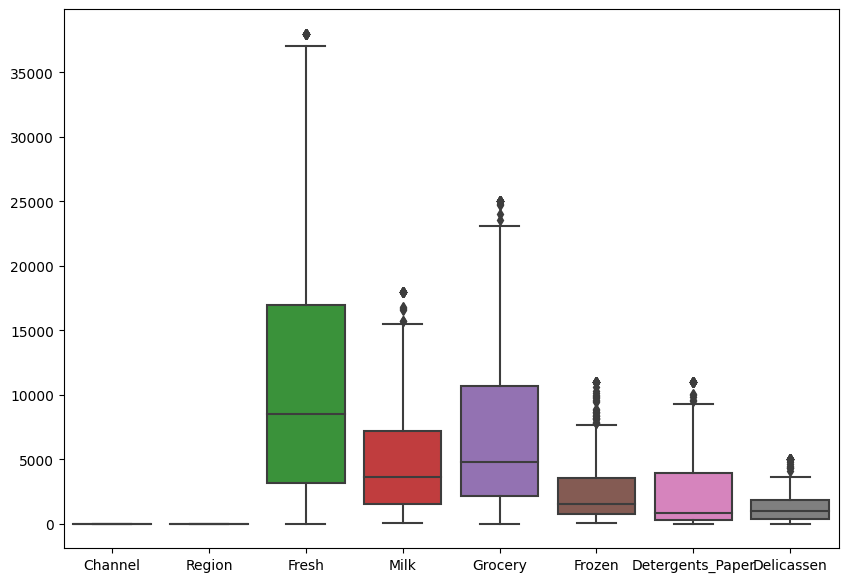

In [21]:
### boxplot x:
plt.figure(figsize=(10,7))
sns.boxplot(data);

In [22]:
data.sample(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
42,2,3,10850,7555,14961,188,6899,46
229,1,1,8656,2746,2501,6845,694,980
351,2,3,1210,10044,22294,1741,11000,3137


In [23]:
len(data)

440

## We will check how the scaling effectes the model learning:

In [33]:
## importing StandardScaler from sklearn lib
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## scaling the x train and y train:
data_scaled = scaler.fit_transform(data)

In [47]:
# importing model kmeans:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances

# Initialize K-means with K-means++ initialization
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init ='auto')

kmeans_model = kmeans.fit(data)

# Get cluster centers and labels of train data points
cluster_centers = kmeans_model.cluster_centers_
labels = kmeans_model.labels_

# Print cluster centers and labels
print(f"Cluster Centers:\n {cluster_centers}")
print(f"\nCluster Labels:\n {labels}")

# Evaluate using Silhouette Score
silhouette_avg = silhouette_score(data, labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')



Cluster Centers:
 [[1.13333333e+00 2.56666667e+00 3.59414000e+04 6.04445000e+03
  6.28861667e+03 6.71396667e+03 1.03966667e+03 3.04946667e+03
  1.01666667e+00]
 [1.26060606e+00 2.55454545e+00 8.25346970e+03 3.82460303e+03
  5.28045455e+03 2.57266061e+03 1.77305758e+03 1.13749697e+03
  4.84848485e-02]
 [1.96000000e+00 2.44000000e+00 8.00004000e+03 1.85114200e+04
  2.75739000e+04 1.99668000e+03 1.24073600e+04 2.25202000e+03
  1.08000000e+00]]

Cluster Labels:
 [1 1 1 1 0 1 1 1 1 2 1 1 0 1 0 1 1 1 1 1 1 1 0 2 0 1 1 1 2 0 1 1 1 0 1 1 0
 1 2 0 0 1 1 2 1 2 2 2 1 2 1 1 0 1 0 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 2 2 0 1 0 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 2 1 1
 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 2 0 1 1 2 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 2 1 0 1 0 1 1 0
 0 1 1 0 1 1

In [48]:
from scipy.spatial.distance import pdist, squareform

def dunn_index(cluster_centers, labels):
    """
    Calculate the Dunn Index for a given clustering.

    Parameters:
        cluster_centers (numpy.ndarray): The cluster centers.
        labels (numpy.ndarray): The cluster labels for each data point.

    Returns:
        float: The Dunn Index.
    """
    # Calculate pairwise Euclidean distances between cluster centers
    inter_cluster_distances = pdist(cluster_centers)

    # Initialize an array to store intra-cluster distances
    intra_cluster_distances = []

    # Iterate through unique cluster labels
    for label in set(labels):
        # Calculate pairwise Euclidean distances between data points within the same cluster
        mask = labels == label
        cluster_points = data[mask]
        intra_cluster_distances.extend(pdist(cluster_points))

    # Calculate minimum inter-cluster distance
    min_inter_distance = min(inter_cluster_distances)

    # Calculate maximum intra-cluster diameter
    max_intra_diameter = max(intra_cluster_distances)

    # Calculate Dunn Index
    dunn_index = min_inter_distance / max_intra_diameter

    return dunn_index

# Calculate Dunn Index
dunn_idx = dunn_index(cluster_centers, labels)
print(f'Dunn Index: {dunn_idx}')



Dunn Index: 0.29212843647084324


- Dunn Index < 0.1: Poor clustering
- 0.1 <= Dunn Index < 0.2: Fair clustering
- 0.2 <= Dunn Index < 0.3: Good clustering
- Dunn Index >= 0.3: Excellent clustering

In [44]:
## plot function:
def plot(feature_1, feature_2, title):
    # Assuming labels are assigned to the original data (before scaling)
    data['Cluster'] = labels

    # Create a scatter plot
    plt.figure(figsize=(8, 6))

    # Scatter plot for Cluster 0
    plt.scatter(data[data['Cluster'] == 0][feature_1], data[data['Cluster'] == 0][feature_2], color='blue', label='Cluster 0')

    # Scatter plot for Cluster 1
    plt.scatter(data[data['Cluster'] == 1][feature_1], data[data['Cluster'] == 1][feature_2], color='red', label='Cluster 1')

    # Scatter plot for Cluster 1
    plt.scatter(data[data['Cluster'] == 2][feature_1], data[data['Cluster'] == 2][feature_2], color='orange', label='Cluster 2')


    # Add cluster centers to the plot
    plt.scatter(cluster_centers[:, 2], cluster_centers[:, 3], s=300, c='yellow', marker='*', label='Cluster Centers')

    # Add labels and legend
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.title(title)
    plt.legend()
    plt.show()

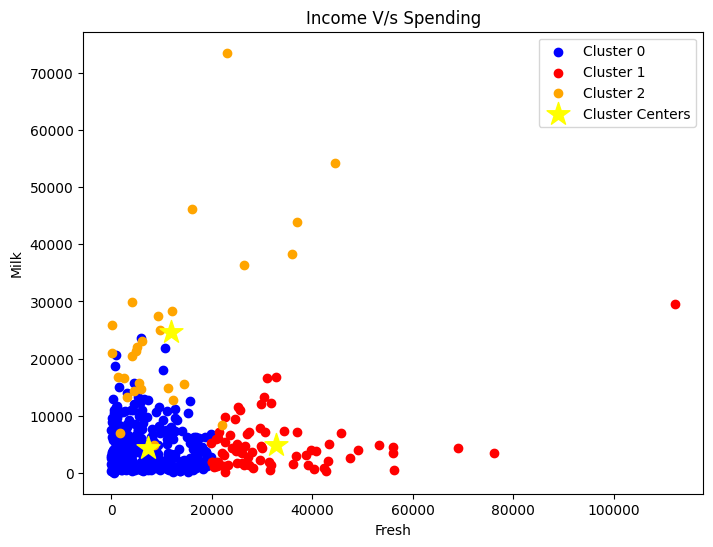

In [45]:
plot(feature_1 = 'Fresh' , feature_2 ='Milk', title = 'Fresh V/s Milk')

---
---
## Hirarical clustering:

In [52]:
# Importing StandardScaler from sklearn lib
from sklearn.cluster import AgglomerativeClustering
import tensorflow as tf


# Initialize AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters= 6)

# Fit the model
agg_labels = agg_clustering.fit(data)

# labels
label = agg_labels.labels_

# Evaluate using Silhouette Score
silhouette_avg = silhouette_score(data, label )
print(f'Silhouette Score: {silhouette_avg:.2f}')




Silhouette Score: 0.31


---
---
## DB SCAN:

In [53]:
## importing StandardScaler from sklearn lib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd



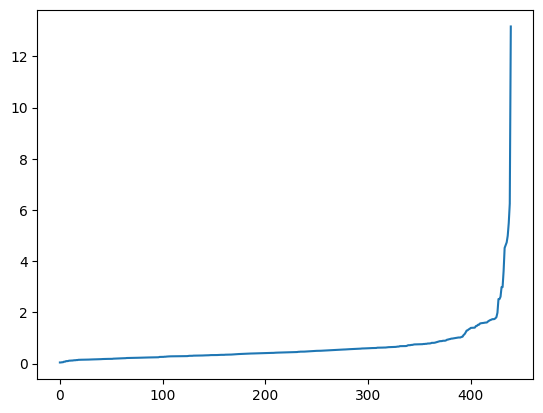

In [54]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Assuming X is your data
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [58]:
from sklearn.cluster import DBSCAN


# Scaling the features
x_scaled = scaler.fit_transform(data)
dbs = DBSCAN(eps=3, min_samples=2)
dbs_model = dbs.fit(x_scaled)
dbs_label = dbs_model.labels_


# Evaluate using Silhouette Score
silhouette_avg = silhouette_score(x_scaled, dbs_label )
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.65


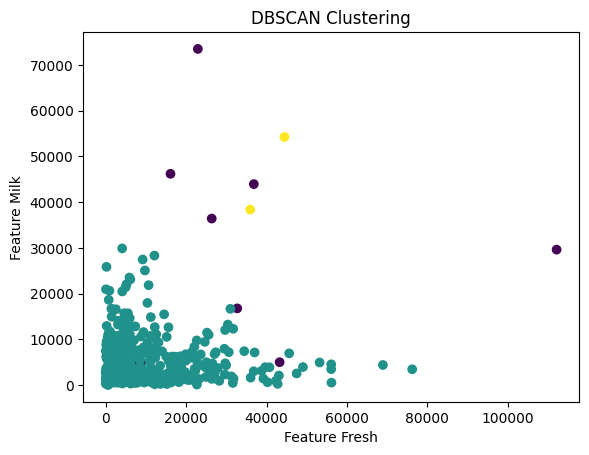